# The Apple case : Data Analysis from reddit subreddit. 

##### NB : the Blizzard crisis occured on the 10/10/2019

### Loading the methods and the data base

In [1]:
from utils.Dates_data_methods import *
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# general database
data = pd.read_csv('data/Apple_case_db.csv')
data = pd.DataFrame(data=data,dtype=object)
data["datetime"] = pd.to_datetime(data["datetime"])  
data["date"] = pd.to_datetime(data["date"])  
data['selftext'] = data['selftext'].replace(np.nan, '')
data

,id,full_link,created,num_comments,selftext,title,score,datetime,date,title_score,text_score
0,bj9g5g,https://www.reddit.com/r/apple/comments/bj9g5g...,1556662346,0,$290 broken 2017 MacBook with water damaged de...,How to Apple.,1,2019-05-01 00:12:26,2019-05-01,0.752156,0.5
1,bj9gcb,https://www.reddit.com/r/apple/comments/bj9gcb...,1556662372,0,[removed],New Apple user - help,1,2019-05-01 00:12:52,2019-05-01,0.789142,-1
2,bj9ioy,https://www.reddit.com/r/apple/comments/bj9ioy...,1556662695,0,[removed],Beats x white/red blinking and a mix of both c...,1,2019-05-01 00:18:15,2019-05-01,0.5,-1
3,bj9jms,https://www.reddit.com/r/apple/comments/bj9jms...,1556662817,0,[removed],Thoughts on getting a new iPhone 8 in 2019?,1,2019-05-01 00:20:17,2019-05-01,0.5,-1
4,bj9ss4,https://www.reddit.com/r/apple/comments/bj9ss4...,1556664138,0,[removed],Quick question about AppleCare,1,2019-05-01 00:42:18,2019-05-01,0.96851,-1
...,...,...,...,...,...,...,...,...,...,...,...
45009,exq6xl,https://www.reddit.com/r/apple/comments/exq6xl...,1580658123,0,[removed],Anybody else experiencing this with their AirP...,1,2020-02-02 16:42:03,2020-02-02,0.810054,-1
45010,exq87z,https://www.reddit.com/r/apple/comments/exq87z...,1580658271,0,,Apple: Coronavirus o FORTEAZA sa ia o Decizie ...,1,2020-02-02 16:44:31,2020-02-02,0.5,-1
45011,exqdeb,https://www.reddit.com/r/apple/comments/exqdeb...,1580658839,0,So I live in Turkey and ecg is not “available”...,Can someone with Apple Watch 5 confirm this re...,1,2020-02-02 16:53:59,2020-02-02,0.5,0.5
45012,exqiy1,https://www.reddit.com/r/apple/comments/exqiy1...,1580659440,0,Not sure if anyone can help with this but here...,change phones on upgrade program?,1,2020-02-02 17:04:00,2020-02-02,0.725368,0.5


In [3]:
# near the crisis databases 
date1 = [2019,9,26]
date2 = [2019,10,23]
df_near_cris = get_posts_between(date1,date2,data)

date1 = [2019,9,18]
date2 = [2019,10,15]
df_near_cris2 = get_posts_between(date1,date2,data)

C:\Users\amelie\Desktop\TUM\Cours\S1\Seminar\Clean_repo\HK_Controversies_Reddit\Dates_data_methods.py:63: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  df_bef_cr = df_old_dates[df_old_dates['date'] >= datetime.date(y1, m1, d1)].copy()
C:\Users\amelie\Desktop\TUM\Cours\S1\Seminar\Clean_repo\HK_Controversies_Reddit\Dates_data_methods.py:64: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  df_near_cris = df_bef_cr[df_bef_cr['date'] <= datetime.date(y2, m2, d2)].copy()


In [4]:
#before the crisis database
date1 = [2019,9,26]
date2 = [2019,10,8]
df_bef_cris = get_posts_between(date1,date2,data)

In [5]:
#after the crisis database
date1 = [2019,10,9]
date2 = [2020,11,2]
df_aft_cris = get_posts_between(date1,date2,data)
df_aft_cris = df_aft_cris.reset_index()

## 1) Qualitative analysis. 

### a) On all the database

In [6]:
most_com_post = data[data['num_comments']== max(data['num_comments'].loc[0:11697])]
lk_most_com_post = data[data['num_comments'] == max(data['num_comments'].loc[0:11697])]['full_link'].values[0]

best_score_post = data[data['score'] == max(data['score'].loc[0:11697])]


data['len_texts'] = [len(i) for i in data['selftext']]
longest_post = data[data['len_texts'] == max(data['len_texts'].loc[0:11697])]

print("Here's the most commented post in the dataframe : " )
print('  ')
print(most_com_post['title'].values[0])
print('  ')
print(str(lk_most_com_post))
print('  ')
print(most_com_post['selftext'].values[0])

Here's the most commented post in the dataframe : 
  
WWDC 2019 | Event Megathread
  
https://www.reddit.com/r/apple/comments/bwd0uy/wwdc_2019_event_megathread/
  
Hello /r/Apple and welcome to the event megathread for WWDC 2017. 

Feel free to play along at home with [Apple Keynote Bingo Pro]()


**How Things Will Work During the Event:**

* Submissions to /r/Apple will be restricted when the event begins (10am PDT/1pm EST). The event megathread will still be active.

* A post-event megathread will appear when the event concludes and the restriction on submissions will be lifted.

* Please note that posts and comments will be actively monitored and we will be removing duplicate threads and spam.

**What to expect:**

* iOS 12
* watchOS 5
* macOS 10.14 (or macOS 11)

**What *could* be announced at WWDC '18:**

* [Refreshed Macbook and Macbook Pro](https://appleinsider.com/articles/18/05/24/i7-macbook-entry-level-13-inch-macbook-pro-shipment-delays-suggest-new-models-inbound-at-wwdc)
* 

In [7]:
print("Here's the longest post ")
print('  ')
print(most_com_post['title'].values[0])
print('  ')
print(longest_post['selftext'].values[0])

Here's the longest post 
  
WWDC 2019 | Event Megathread
  
 If you haven’t already heard, Apple has given their iPod touch a minor update for the first time in four years. Its processor was updated from the A8 which first appeared in the iPhone 6, to the A10, giving it the same performance as the iPhone 7. Also, Apple added an option for 256GB of storage, which means this 7th gen iPod touch has the highest capacity of any iPod ever, including the Classic which offered 160GB of storage at its peak.

Now that may not sound like a very news-worthy update, but what most people were surprised by aren’t the improvements made to the iPod, but that the iPod touch was updated at all, since rumors surrounding its discontinuation have been circulating for years. So why exactly is Apple still selling iPods in 2019? 

Now the iPod has played a very significant role in Apple’s history. It was introduced in 2001 and completely changed the way people thought about music players. They went from cheap 

In [8]:
print("Here's the post with the best score ")
print('  ')
print(best_score_post['title'].values[0])
print('  ')
print(best_score_post['selftext'].values[0])
print(best_score_post['full_link'].values[0])
print('  ')

Here's the post with the best score 
  
Jony Ive, iPhone designer, announces Apple departure
  

https://www.reddit.com/r/apple/comments/c6avjy/jony_ive_iphone_designer_announces_apple_departure/
  


### b) Before the event

In [9]:
most_com_post = df_bef_cris[df_bef_cris['num_comments']== max(df_bef_cris['num_comments'].loc[0:11697])]
lk_most_com_post = df_bef_cris[df_bef_cris['num_comments'] == max(df_bef_cris['num_comments'].loc[0:11697])]['full_link'].values[0]
df_bef_cris['len_texts'] = [len(i) for i in df_bef_cris['selftext']]
longest_post = df_bef_cris[df_bef_cris['len_texts'] == max(df_bef_cris['len_texts'].loc[0:11697])]
best_score_post = df_bef_cris[df_bef_cris['score'] == max(df_bef_cris['score'].loc[0:11697])]

In [10]:
print("Here's the most commented post in the dataframe : " )
print('  ')
print(str(lk_most_com_post))
print('  ')
print(most_com_post['title'].values[0])
print('  ')
print(most_com_post['selftext'].values[0])

Here's the most commented post in the dataframe : 
  
https://www.reddit.com/r/apple/comments/d9z9di/permanent_jailbreak_for_a5_to_a11_devices/
  
Permanent jailbreak for A5 to A11 devices released, first jailbreak of its kind since 2009
  



In [11]:
print("Here's the longest post : ")
print('  ')
print(longest_post['selftext'].values[0])
print('  ')
print(longest_post['full_link'].values[0])

Here's the longest post : 
  
Hi, Reddit. I've had a pretty crazy few months with my MacBook Air and was looking for some advice.

I bought a MacBook (2018) on January 1st, 2019. I paid a total about $1300 for the laptop including some accessories and tax. I use the laptop for a few months, and start having the infamous keyboard issues. The keys were duplicating and bugging out when they shouldn't have been. I start reaching and realize this is a pretty big problem. Crap.

I go to my local Apple store, show them this problem, and they say we'll fix it for free. So, they do, and a week later, I get my repaired device. Awesome. I thought this would only happen once and I could move on.

A few weeks later, I start having the same problem again. Sprayed it with air, did the basic troubleshooting, and go back into the Apple store. I show the guy how my keys are duplicating, but when he tried, magically, it just stopped. That sucked. They sprayed it with air, said dust came out of it, noted 

In [12]:
print("Here's the post with the best score ")
print('  ')
print(best_score_post['title'].values[0])
print('  ')
print(best_score_post['selftext'].values[0])
print(best_score_post['full_link'].values[0])
print('  ')

Here's the post with the best score 
  
Permanent jailbreak for A5 to A11 devices released, first jailbreak of its kind since 2009
  

https://www.reddit.com/r/apple/comments/d9z9di/permanent_jailbreak_for_a5_to_a11_devices/
  


### c) After the event

In [13]:
most_com_post = df_aft_cris[df_aft_cris['num_comments']== max(df_aft_cris['num_comments'].loc[0:len(df_aft_cris)])]
lk_most_com_post = df_aft_cris[df_aft_cris['num_comments'] == max(df_aft_cris['num_comments'].loc[0:len(df_aft_cris)])]['full_link'].values[0]
df_aft_cris['len_texts'] = [len(i) for i in df_aft_cris['selftext']]
longest_post = df_aft_cris[df_aft_cris['len_texts'] == max(df_aft_cris['len_texts'].loc[0:len(df_aft_cris)])]
best_score_post = df_aft_cris[df_aft_cris['score'] == max(df_aft_cris['score'].loc[0:11697])]

In [14]:
print("Here's the longest post : ")
print('  ')
print(longest_post['selftext'].values[0])
print(longest_post['full_link'].values[0])

Here's the longest post : 
  
The last few years were big for non-gaming subscription-based apps in the Apple App Store. During this period, several simple apps started making millions of dollars per month.

For example, Celebrity Voice Changer makes over $3M per month and raked in almost $30M in the past few years. QR Code Reader by Tinylab made over $800K last month and over $13M over the last few years. An app called Life Advisor generated over $1M in revenue in the last month alone.

Some of the companies developing pretty basic apps have even become unicorns. In February, Calm raised $88M in funding at a $1B valuation. The maker of Facetune app raised $135M at a unicorn valuation In July.

But how do they do this?

These apps aren’t powered by any innovative technology; they don’t have network effects; and they are pretty easy to copy. So what is their secret sauce? Subscriptions. To be more specific, the obscure way that subscriptions used to work in iOS.

I said “used to work” b

In [15]:
print("Here's the most commented post in the dataframe : " )
print('  ')
print(str(lk_most_com_post))
print('  ')
print(most_com_post['title'].values[0])
print('  ')
print(most_com_post['selftext'].values[0])

Here's the most commented post in the dataframe : 
  
https://www.reddit.com/r/apple/comments/doauda/apple_reveals_new_airpods_pro_available_october_30/
  
Apple reveals new AirPods Pro, available October 30
  



In [16]:
print("Here's the post with the best score ")
print('  ')
print(best_score_post['title'].values[0])
print('  ')
print(best_score_post['selftext'].values[0])
print(best_score_post['full_link'].values[0])
print('  ')

Here's the post with the best score 
  
#BoycottApple trending as Apple removes Quartz news and HKmap apps from App Store
  

https://www.reddit.com/r/apple/comments/dfxxpz/boycottapple_trending_as_apple_removes_quartz/
  


## 2) Study of the number of comments and submissions

### a) Number of submissions 

C:\Users\amelie\Anaconda3\envs\HK2\lib\site-packages\matplotlib\axes\_axes.py:2179: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  dx = [convert(x0 + ddx) - x for ddx in dx]


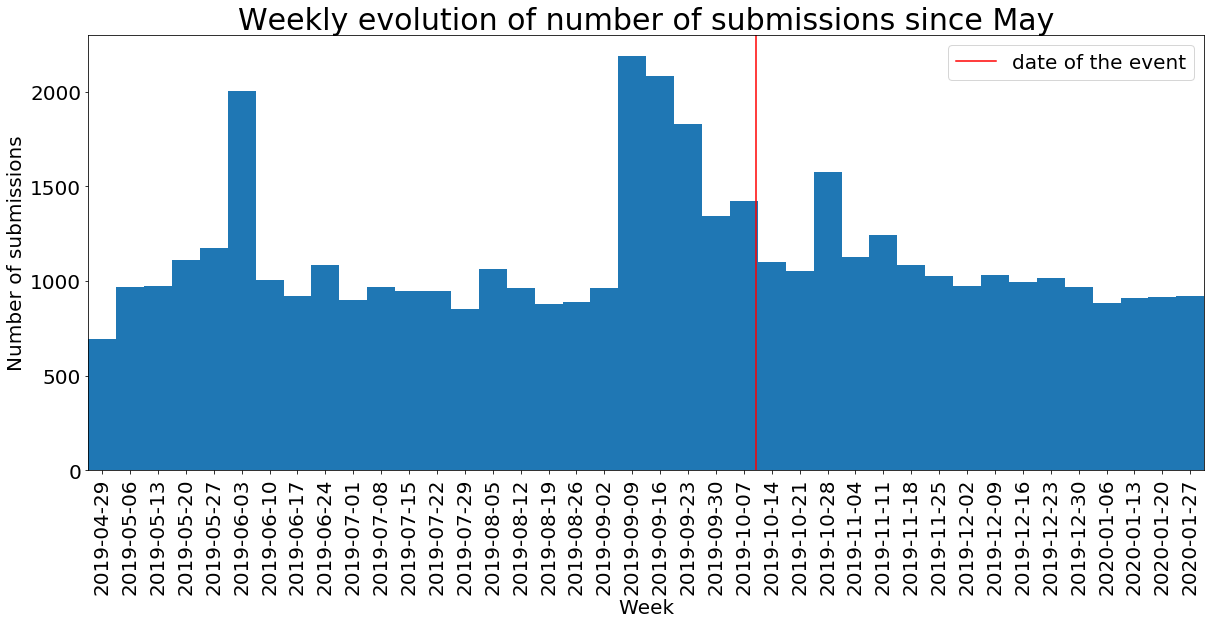

In [17]:
# Get the histogram of the number of submissions for the database retrieved

week = data.groupby(pd.Grouper(key='datetime', freq='W-MON', closed = 'left', label='left'))['date'].count().index
week_sub = data.groupby(pd.Grouper(key='datetime', freq='W-MON', closed = 'left', label='left'))['date'].count().values

fig = plt.figure(figsize=(20,8))
plt.bar(week, week_sub, width = 1)
plt.title('Weekly evolution of number of submissions since May',fontsize=30)
plt.xlabel("Week", fontsize=20)
plt.axvline(x='2019-10-10',color = 'r',label = 'date of the event')
plt.legend(fontsize = 20)
plt.xticks(week, rotation='vertical')
plt.ylabel('Number of submissions', fontsize=20)
plt.tick_params(labelsize=20)

plt.margins(x = 0, tight = True)

### b) Number of comments

### 1) Large view

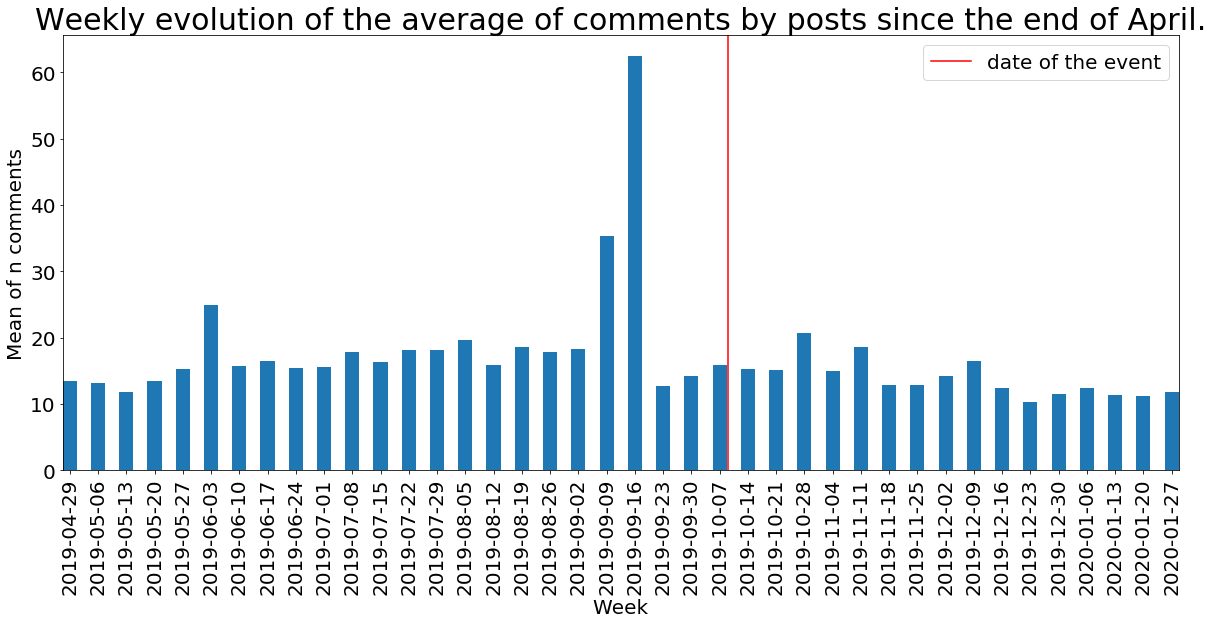

In [53]:
# Get the histogram of the number of comments

data['num_comments'] = data.num_comments.astype(float)

week_mean = data.groupby(pd.Grouper(key='datetime', freq='W-MON', closed = 'left', 
                                       label='left'))['num_comments'].mean().index

week_sub_mean = data.groupby(pd.Grouper(key='datetime', freq='W-MON', closed = 'left', 
                                           label='left'))['num_comments'].mean().values

fig = plt.figure(figsize=(20,8))
plt.bar(week_mean, week_sub_mean, width = 3.5)
plt.title('Weekly evolution of the average of comments by posts since the end of April.',fontsize=30)
plt.axvline(x='2019-10-9',color = 'r',label = 'date of the event')
plt.legend(fontsize=20)
plt.xlabel("Week", fontsize=20)
plt.xticks(week_mean, rotation='vertical')
plt.ylabel('Mean of n comments', fontsize=20)
plt.tick_params(labelsize=20)
plt.margins(x = 0, tight = True)

The median of the number of comments is of zero for all the comments of each week: a half of all the submissions or more on this has not been commented. 

### 2) view with dates that are closer to the event

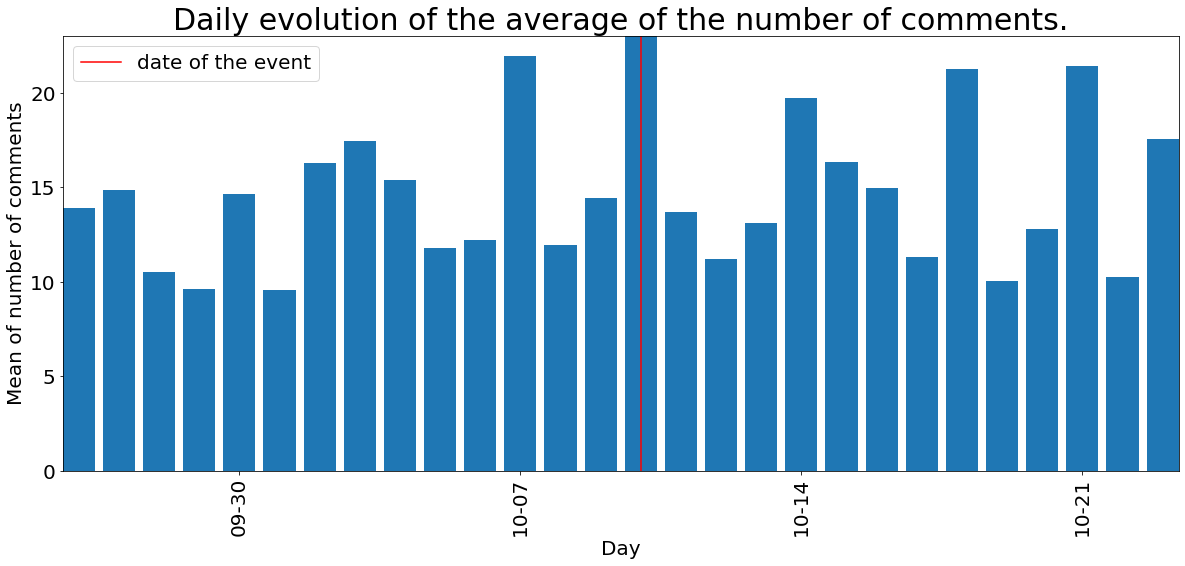

In [55]:
# Get the histogram of the number of comments
df_near_cris['num_comments'] = df_near_cris.num_comments.astype(float)

day = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                       label='left'))['date'].count().index

day_sub = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                           label='left'))['num_comments'].mean().values

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)
plt.bar(day, day_sub)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
plt.title('Daily evolution of the average of the number of comments.',fontsize=30)
plt.xlabel("Day", fontsize=20)
plt.axvline(x='2019-10-10',color = 'r',label = 'date of the event')
plt.legend(fontsize= 20)
plt.xticks(week, rotation='vertical')
plt.ylabel('Mean of number of comments', fontsize=20)
plt.tick_params(labelsize=20)
plt.margins(x = 0,y=0, tight = True)

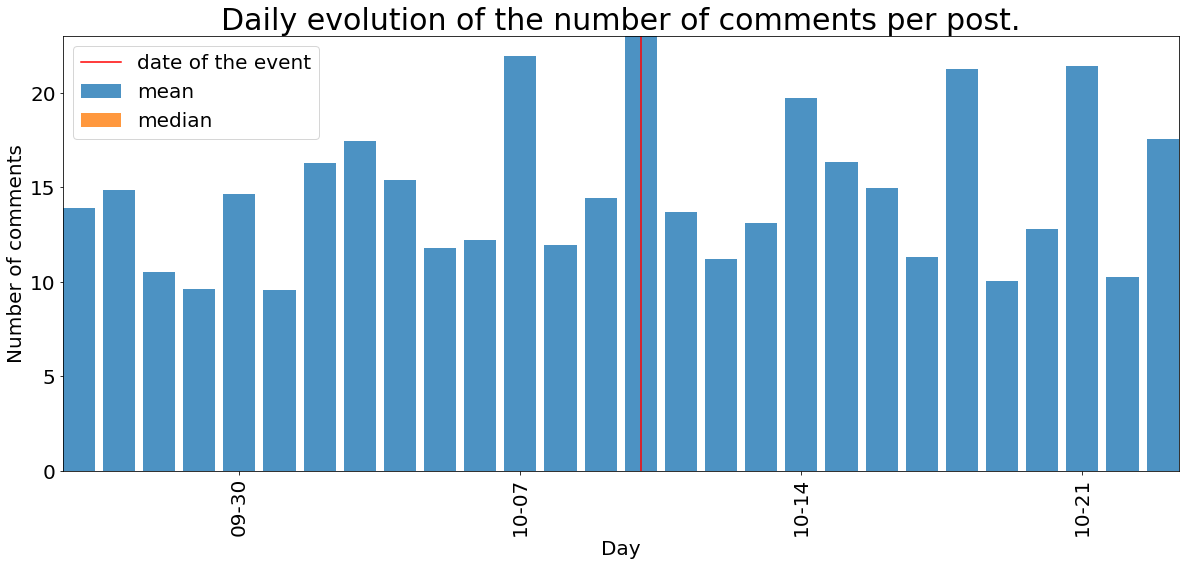

In [56]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)
plt.bar(day, day_sub,alpha=0.8,label = 'mean')
plt.bar(day2, day_sub2,alpha=0.8,label = 'median')
plt.axvline(x='2019-10-10',color = 'r',label = 'date of the event')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
plt.title('Daily evolution of the number of comments per post.',fontsize=30)
plt.xlabel("Day", fontsize=20)
plt.xticks(week, rotation='vertical')
plt.ylabel('Number of comments', fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.margins(x = 0,y=0, tight = True)

## 3) Length of the posts

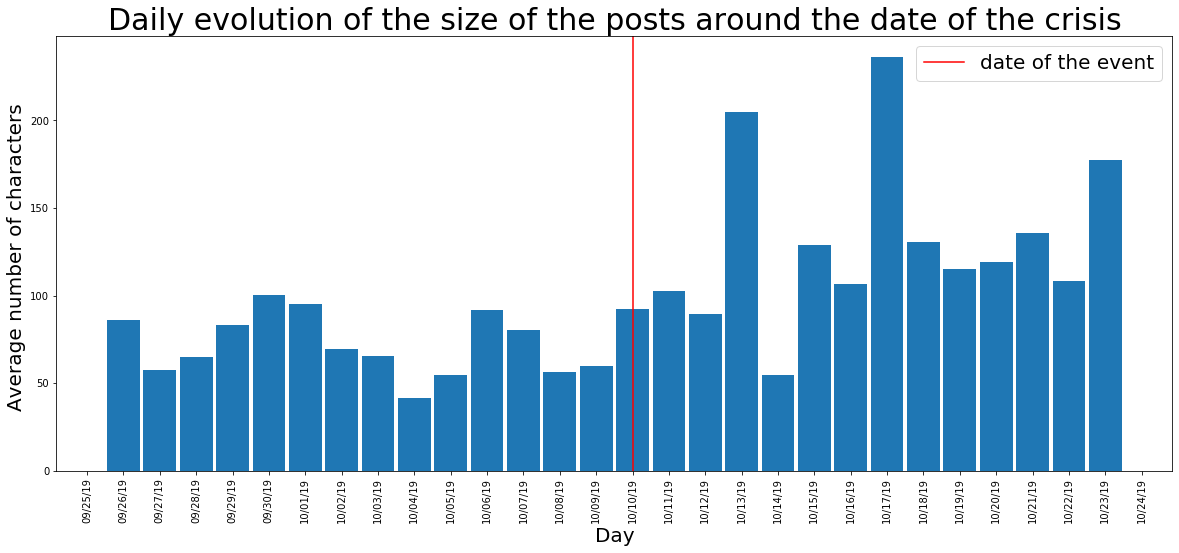

In [57]:
# len of the text near the crisis
length_post = [len(df_near_cris.loc[i]['selftext']) for i in range(len(df_near_cris))]
df_near_cris['len_texts'] = length_post
day = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                      label='left'))['len_texts'].mean().index

val_day = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                          label='left'))['len_texts'].mean().values


fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
ax.set_title('Daily evolution of the size of the posts around the date of the crisis', fontsize =30)
plt.bar( day, val_day, width = 0.9)
plt.axvline(x='2019-10-10',color = 'r',label = 'date of the event')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D')) 
plt.xlabel("Day", fontsize=20)
plt.legend(fontsize=20)
plt.xticks( rotation='vertical')
plt.ylabel('Average number of characters ', fontsize=20)
plt.show()

## 4) Score evolution

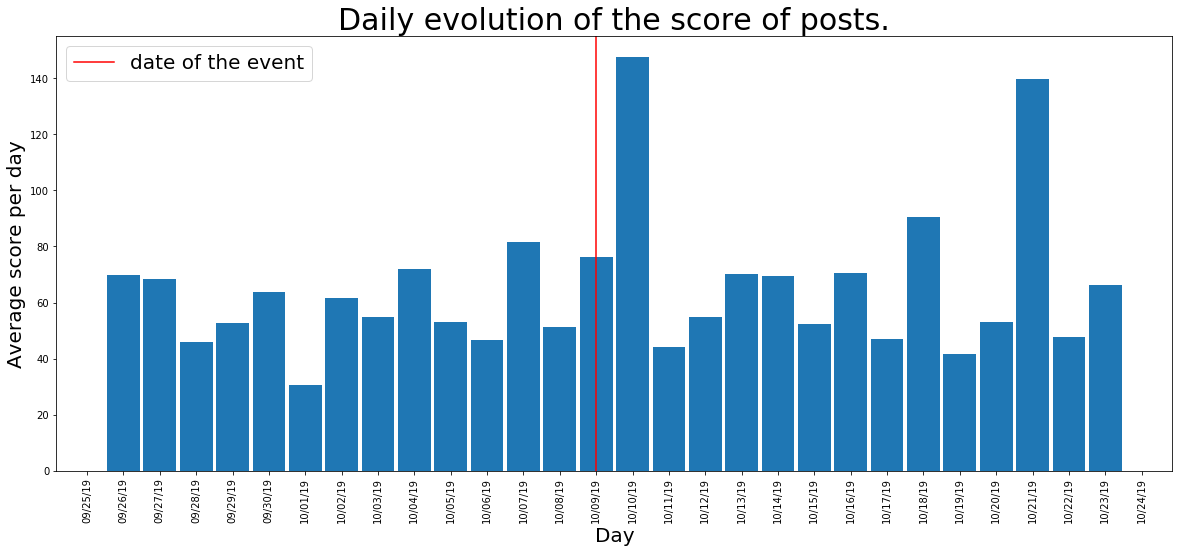

In [58]:
df_near_cris['score'] = df_near_cris.score.astype(float)

day = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                      label='left'))['score'].mean().index

val_day = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                          label='left'))['score'].mean().values


fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
plt.bar( day, val_day, width = 0.9)
plt.axvline(x='2019-10-9',color = 'r',label = 'date of the event')
plt.legend(fontsize=20)
ax.set_title('Daily evolution of the score of posts.',fontsize=30)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D')) 
plt.xlabel("Day", fontsize=20)

plt.xticks( rotation='vertical')
plt.ylabel('Average score per day', fontsize=20)
plt.show()

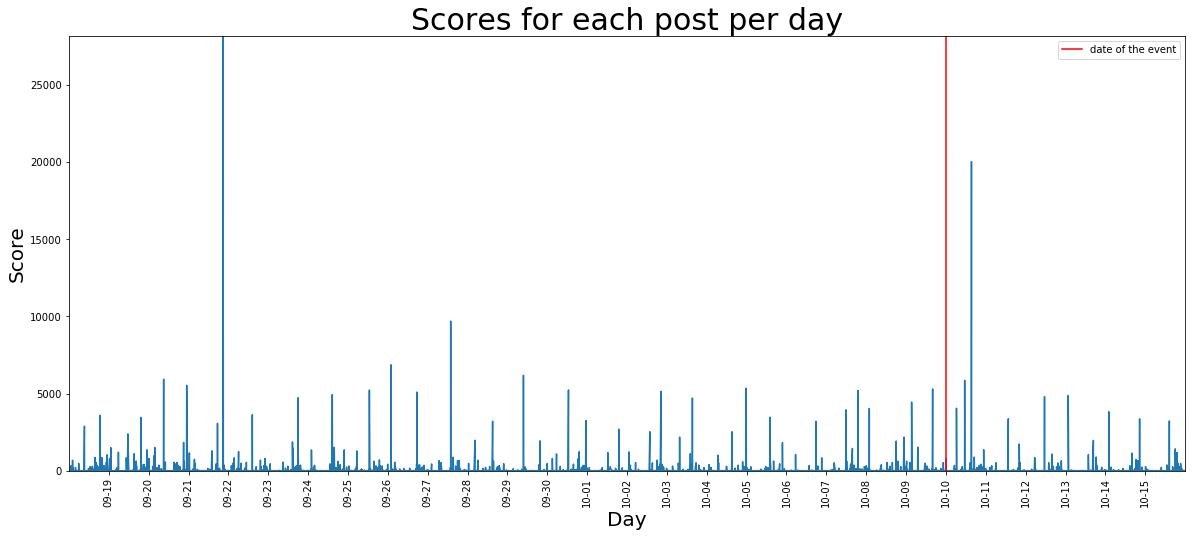

In [25]:

df_near_cris2['score'] = df_near_cris2.score.astype(float)


fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(1,1,1)  
ax.set_title('Scores for each post per day', fontsize = 30)
plt.plot( df_near_cris2['datetime'], df_near_cris2['score'] )
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  
plt.axvline(x='2019-10-10',color = 'r',label = 'date of the event')
plt.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
plt.xlabel("Day", fontsize=20)
plt.xticks( rotation='vertical')
plt.ylabel('Score', fontsize=20)
plt.margins(x = 0,y=0, tight = True)

## 5) Removed submissions and the correlation with title-only posts

### a) Removed posts

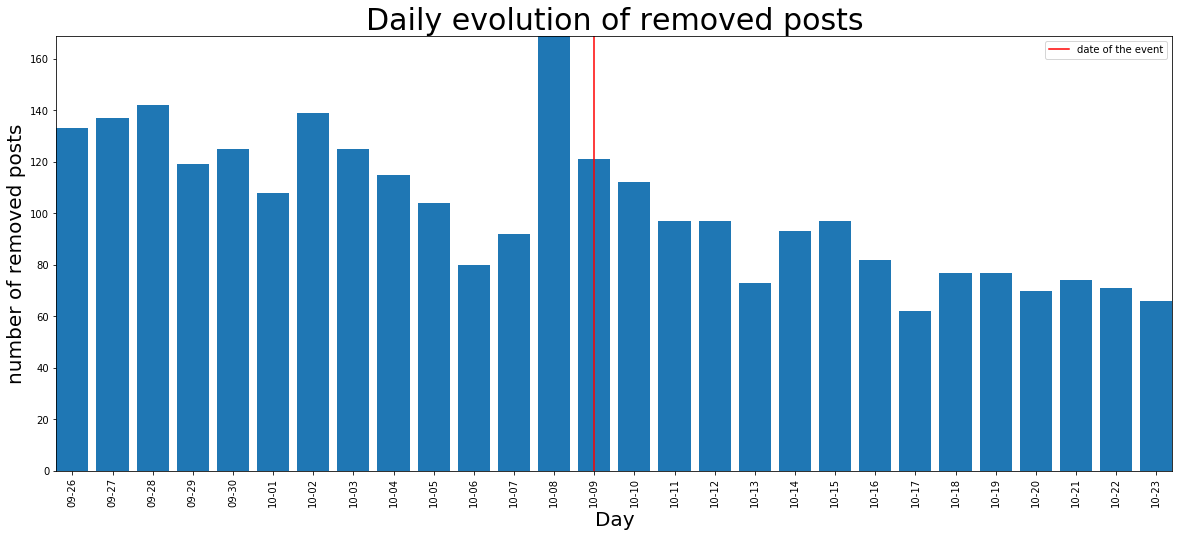

In [59]:

df_near_cris['text_removed'] = df_near_cris['selftext'] == '[removed]'

day_rm = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                      label='left'))['text_removed'].sum().index

val_day_rm = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                          label='left'))['text_removed'].sum().values

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
plt.bar(day_rm, val_day_rm)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
ax.set_title('Daily evolution of removed posts', fontsize=30)
plt.xlabel("Day", fontsize=20)
plt.axvline(x='2019-10-9',color = 'r',label = 'date of the event')
plt.legend()
plt.xticks( rotation='vertical')
plt.ylabel('number of removed posts', fontsize=20)
plt.margins(x = 0,y=0, tight = True)

### b) Posts with just a title

#### NB : because of the megathread to contain the number of submissions, we observed that some user posted posts with just a title and an image, and no text. This is a way of overcoming the deletion of posts are image are less easy to analyse than text on a large scale. 

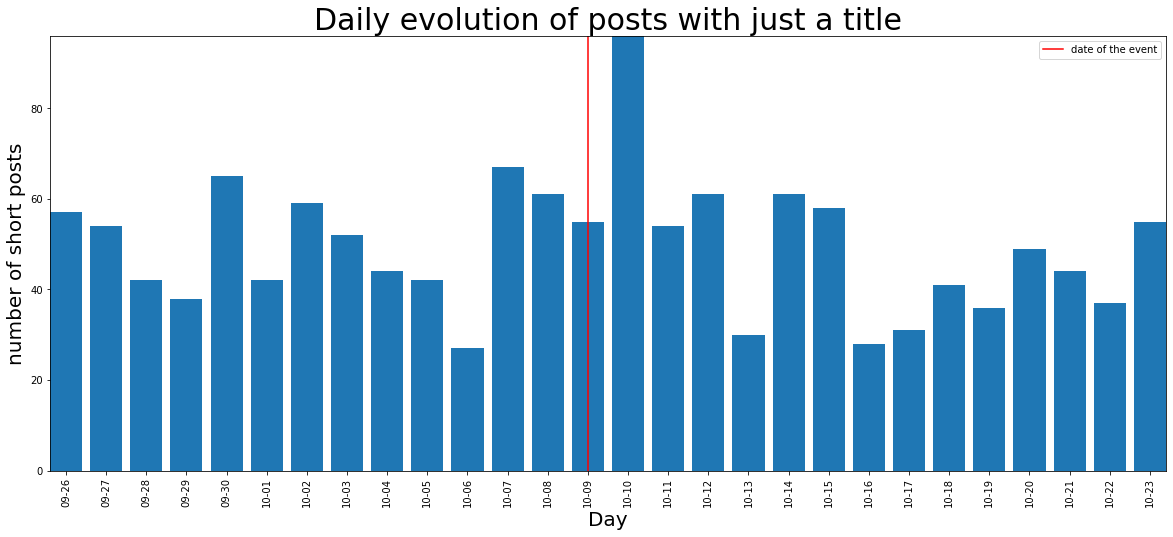

In [60]:
short_posts = df_near_cris[df_near_cris['len_texts'] ==0].copy()
short_posts = short_posts.reset_index()

day_im = short_posts.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                      label='left'))['date'].count().index

val_day_im = short_posts.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                          label='left'))['date'].count().values

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
plt.bar(day_im, val_day_im)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
ax.set_title('Daily evolution of posts with just a title', fontsize=30)
plt.xlabel("Day", fontsize=20)
plt.xticks( rotation='vertical')
plt.axvline(x='2019-10-9',color = 'r',label = 'date of the event')
plt.legend()
plt.ylabel('number of short posts', fontsize=20)
plt.margins(x = 0,y=0, tight = True)

#### Here we can see a post of an image for sure. It has no self text.

In [61]:
print('Title of the post : ')
print('')
print( '" '  +str(short_posts['title'][2])+ ' "' )
print('')
print('Text of the post : '+ '" '  +str(short_posts['selftext'][2])+ '"' )


Title of the post : 

" How it feels trying to find information about the U1 chip "

Text of the post : " "


### c) Correlation between number of removed posts and posts with just a title

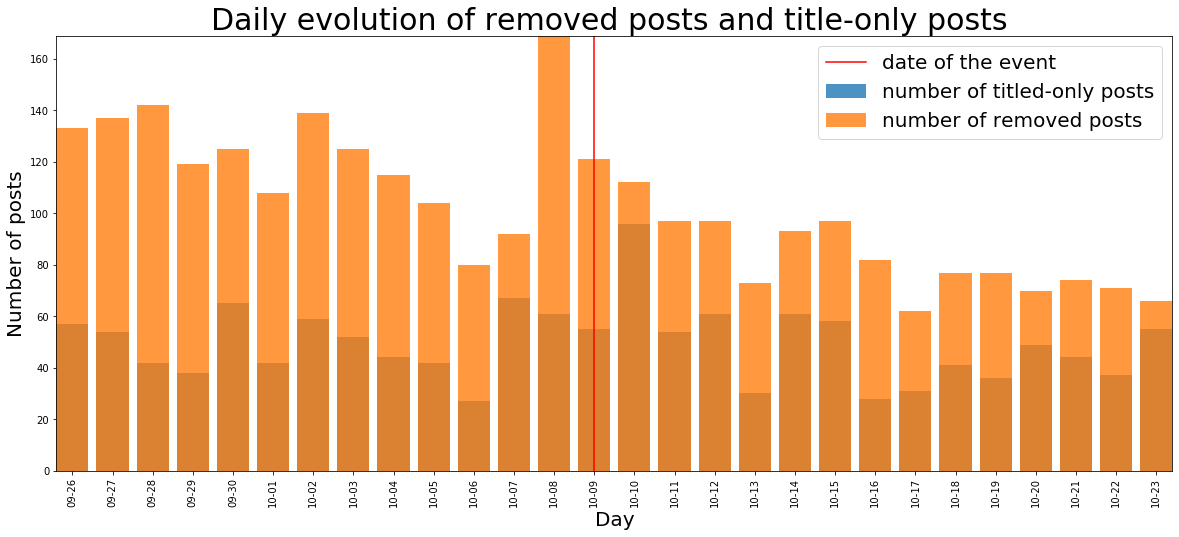

In [62]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
plt.bar(day_im, val_day_im,label = 'number of titled-only posts',alpha=0.8)
plt.bar(day_rm, val_day_rm,label = 'number of removed posts',alpha=0.8)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
ax.set_title('Daily evolution of removed posts and title-only posts ', fontsize=30)
plt.xlabel("Day", fontsize=20)
plt.axvline(x='2019-10-9',color = 'r',label = 'date of the event')

plt.xticks( rotation='vertical')
plt.ylabel('Number of posts', fontsize=20)
plt.legend(fontsize=20)
plt.margins(x = 0,y=0, tight = True)

# 6) Opinion Analysis

In [63]:
post_max_title = df_near_cris[df_near_cris['title_score'] == min(df_near_cris['title_score'])]
post_max_title['title']

178    AirPods problem
Name: title, dtype: object

In [64]:
post_min_title = df_near_cris[df_near_cris['title_score'] == max(df_near_cris['title_score'])]
post_min_title['title']

429     Right AirPod Not Charging
3516     Right earpod not working
Name: title, dtype: object

In [65]:
post_av_title = df_near_cris[df_near_cris['title_score'] < 0.7 ]
post_av_title = post_av_title[post_av_title['title_score'] > 0.4 ]
i = np.random.randint(len(post_av_title))
print(post_av_title.iloc[i]['title'])
print(post_av_title.iloc[i]['selftext'])
print(post_av_title.iloc[i]['full_link'])
print(post_av_title.iloc[i]['title_score'])

Will apple replace or repair my device
[removed]
https://www.reddit.com/r/apple/comments/dg0yyg/will_apple_replace_or_repair_my_device/
0.5


Text(0, 0.5, 'Average score per day')

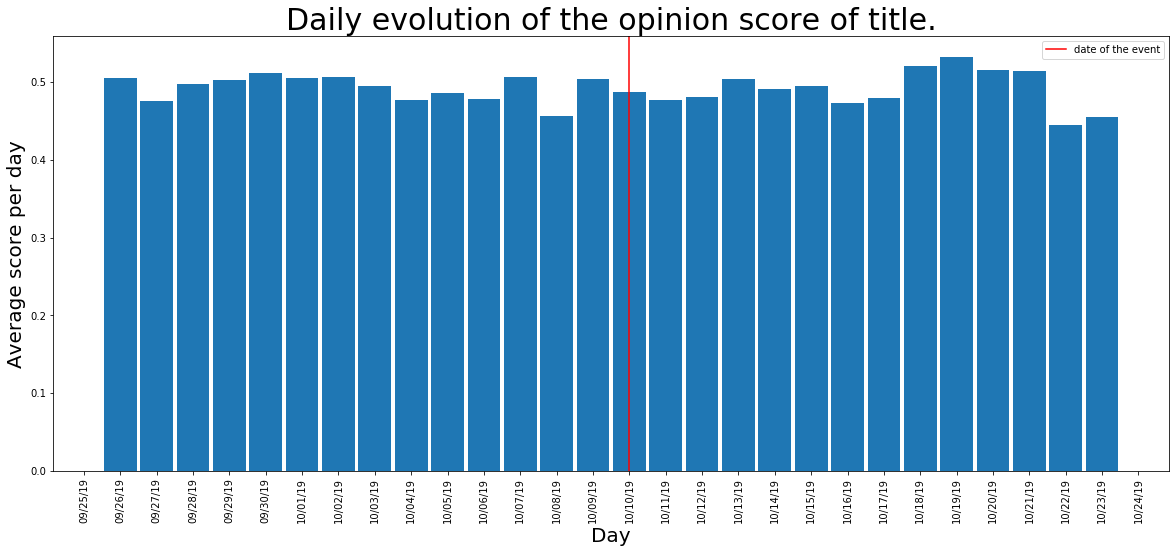

In [66]:
df_removed_empty = df_near_cris[df_near_cris['title_score'] >0]
df_removed_empty['title_score'] = df_near_cris.title_score.astype(float)

day = df_removed_empty.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                      label='left'))['title_score'].mean().index

val_day = df_removed_empty.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                          label='left'))['title_score'].mean().values


fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
plt.bar( day, val_day, width = 0.9)
plt.axvline(x='2019-10-10',color = 'r',label = 'date of the event')
plt.legend()
ax.set_title('Daily evolution of the opinion score of title.',fontsize=30)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D')) 
plt.xlabel("Day", fontsize=20)

plt.xticks( rotation='vertical')
plt.ylabel('Average score per day', fontsize=20)

Text(0, 0.5, 'Average score per day')

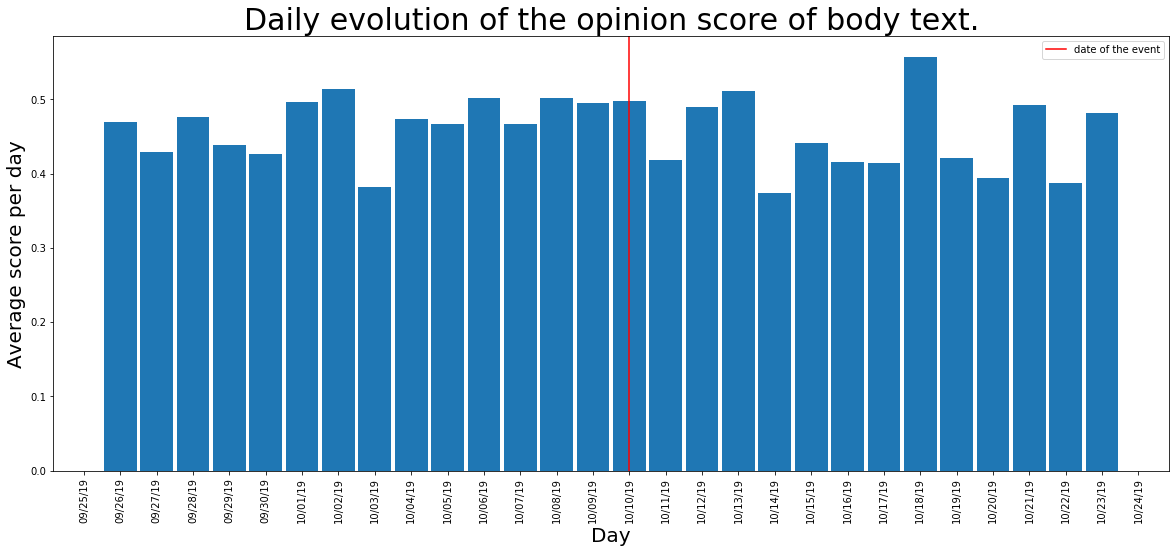

In [67]:
df_removed_empty = df_near_cris[df_near_cris['text_score'] >0].copy()
df_removed_empty['text_score'] = df_near_cris.text_score.astype(float)

day = df_removed_empty.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                      label='left'))['text_score'].mean().index

val_day = df_removed_empty.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                          label='left'))['text_score'].mean().values


fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
plt.bar( day, val_day, width = 0.9)
plt.axvline(x='2019-10-10',color = 'r',label = 'date of the event')
plt.legend()
ax.set_title('Daily evolution of the opinion score of body text.',fontsize=30)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D')) 
plt.xlabel("Day", fontsize=20)

plt.xticks( rotation='vertical')
plt.ylabel('Average score per day', fontsize=20)

### Before and after event opinion distribution

In [68]:
# before the crisis. 
be_title_score = []
be_text_score = []
be_score_tl = []
be_score_te = []
for i in range(len(df_bef_cris)) : 
    
    if df_bef_cris.iloc[i]['title_score'] > 0 :
        be_score_tl.append(df_bef_cris.iloc[i]['score'])
        be_title_score.append(df_bef_cris.iloc[i]['title_score'])
    
    
    if df_bef_cris.iloc[i]['text_score'] > 0 :
        be_score_te.append(df_bef_cris.iloc[i]['score'])
        be_text_score.append(df_bef_cris.iloc[i]['text_score'])

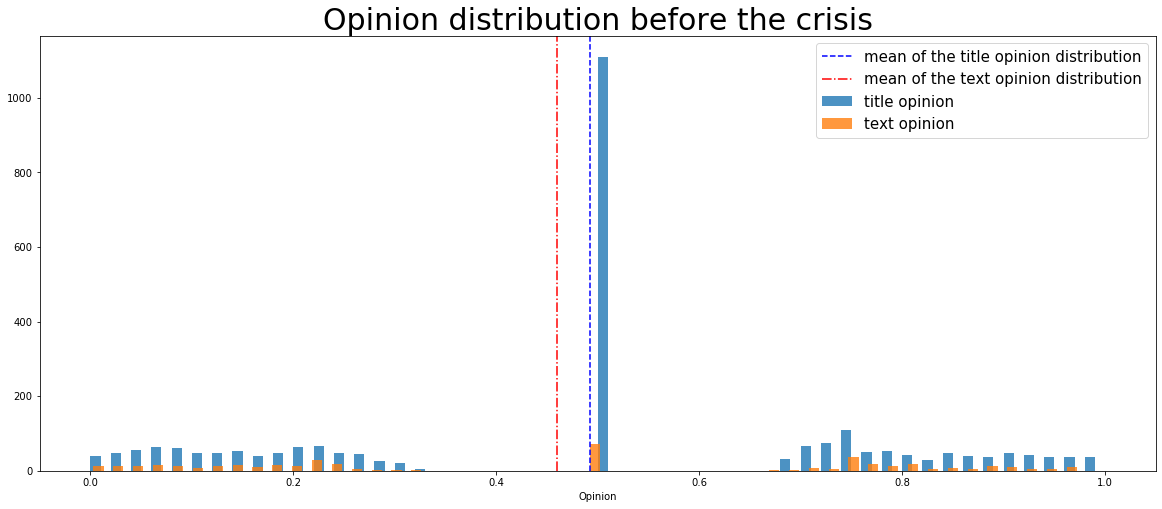

In [69]:
fig = plt.figure(figsize=(20,8))
num_bins = 50
plt.hist(be_title_score, num_bins,width = 0.01,alpha = 0.8,label = 'title opinion')
plt.hist(be_text_score, num_bins,width = 0.01,alpha = 0.8,label = 'text opinion')
plt.title('Opinion distribution before the crisis',fontsize = 30)
plt.axvline(x=np.mean(be_title_score),linestyle = '--',label = 'mean of the title opinion distribution',color = 'b')
plt.axvline(x=np.mean(be_text_score),linestyle = '-.',label = 'mean of the text opinion distribution',color = 'r')
plt.legend(fontsize = 15)
plt.xlabel('Opinion')
plt.show()


In [37]:
print(np.std(be_title_score))
print(np.std(be_text_score))

0.2660800981184512
0.3150526264762457


In [38]:
# after the crisis. 
aft_title_score = []
aft_text_score = []
aft_score_tl = []
aft_score_te = []
for i in range(len(df_aft_cris)) : 
    
    if df_aft_cris.iloc[i]['title_score'] > 0 :
        aft_score_tl.append(df_aft_cris.iloc[i]['score'])
        aft_title_score.append(df_aft_cris.iloc[i]['title_score'])
    
    
    if df_aft_cris.iloc[i]['text_score'] > 0 :
        aft_score_te.append(df_aft_cris.iloc[i]['score'])
        aft_text_score.append(df_aft_cris.iloc[i]['text_score'])

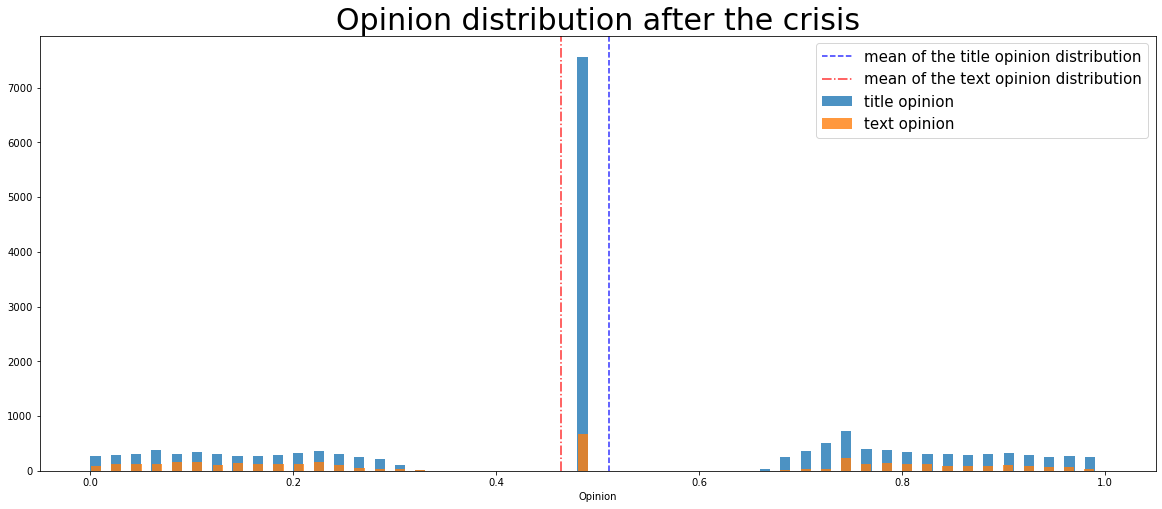

In [39]:
fig = plt.figure(figsize=(20,8))
num_bins = 50
plt.hist(aft_title_score, num_bins,width = 0.01,alpha = 0.8,label = 'title opinion')
plt.hist(aft_text_score, num_bins,width = 0.01,alpha = 0.8,label = 'text opinion')
plt.title('Opinion distribution after the crisis',fontsize = 30)
plt.axvline(np.mean(aft_title_score),linestyle = '--',label = 'mean of the title opinion distribution',color = 'b',alpha = 0.8)
plt.axvline(np.mean(aft_text_score),linestyle = '-.',label = 'mean of the text opinion distribution',color = 'r',alpha = 0.8)
plt.legend(fontsize = 15)
plt.xlabel('Opinion')
plt.show()

In [40]:
print(np.std(aft_title_score))
print(np.std(aft_text_score))

0.2626664201757483
0.3220614390159383


## Correlation between score and opinion

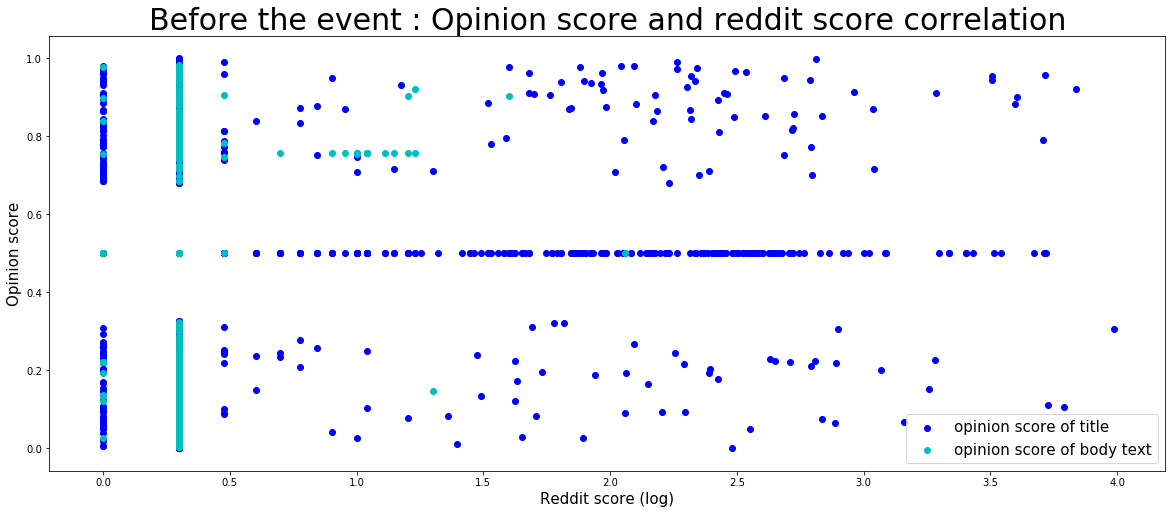

In [41]:
norm_tl = np.log10(np.array(be_score_tl)+np.ones(len(be_score_tl)))
norm_te = np.log10(np.array(be_score_te)+np.ones(len(be_score_te)))
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1) 
plt.scatter(norm_tl,be_title_score,color = 'b',label='opinion score of title')
plt.scatter(norm_te,be_text_score,color = 'c',label='opinion score of body text')
plt.title('Before the event : Opinion score and reddit score correlation',fontsize = 30)
plt.legend(fontsize = 15)
plt.ylabel('Opinion score',fontsize = 15)
plt.xlabel('Reddit score (log)',fontsize = 15)
plt.show()

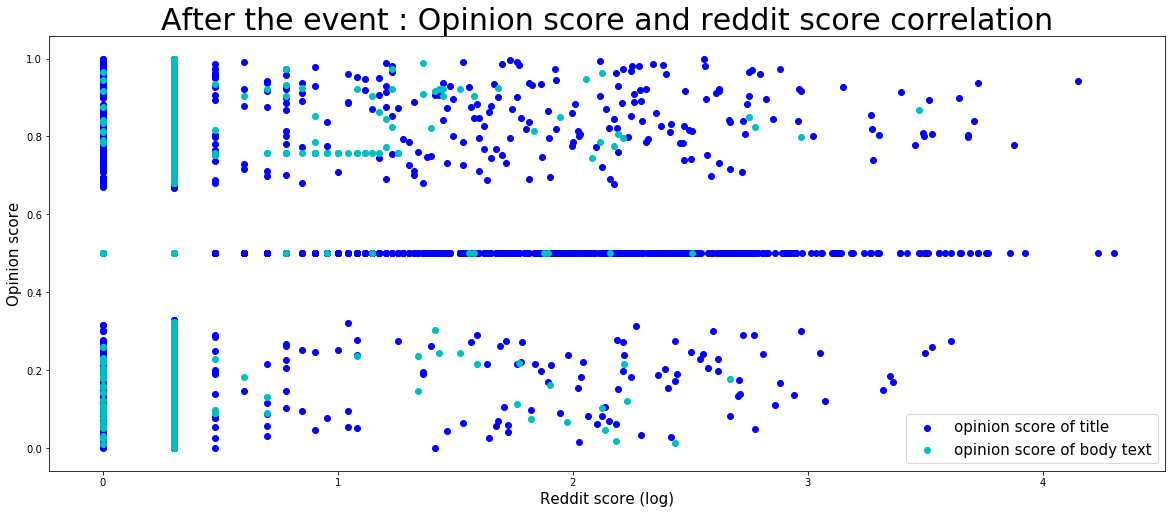

In [42]:
norm_tl = np.log10(np.array(aft_score_tl)+np.ones(len(aft_score_tl)))
norm_te = np.log10(np.array(aft_score_te)+np.ones(len(aft_score_te)))
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1) 
plt.scatter(norm_tl,aft_title_score,color = 'b',label='opinion score of title')
plt.scatter(norm_te,aft_text_score,color = 'c',label='opinion score of body text')
plt.title('After the event : Opinion score and reddit score correlation',fontsize = 30)
plt.legend(fontsize = 15)
plt.ylabel('Opinion score',fontsize = 15)
plt.xlabel('Reddit score (log)',fontsize = 15)
plt.show()